# Homework 4. Frequent Words and Web scraping

***Double Click here to edit this cell***

- Name: 김수연
- Student ID: 201800839
- Submission date: 2020 5/16

## Problem 1 (15 pts)

- Project Gutenberg is a volunteer effort to digitize and archive cultural works.
- Moby-Dick is an 1851 novel by American writer Herman Melville.
- You can find Moby-Dick in an ordinary text format at https://www.gutenberg.org/files/2701/old/moby10b.txt
- Use **requests** module to get the text.


- We want to compute word frequency of words appearing in mobydick and generate WordCloud
    - First, you must split the text into words. 
    - To do that, **find word delimiters** (for example, . or , ... whatever).
    - To split into words, use **re** (regular expression module)
    - Numbers should not be words. 
    - Null string is not a word. 
    - Any delimiters should not be words.
    - (Upper or lower) Cases does not matter in words

### 1.1 Print top 50 most common words (5 pts)

In [1]:
# YOUR CODE MUST BE HERE
import requests, re
from collections import Counter
url = "https://www.gutenberg.org/files/2701/old/moby10b.txt"
moby_text = requests.get(url).text
moby_word = re.findall(r"[^\d\W']+", moby_text.lower())
print(Counter(moby_word).most_common(n=50))

[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]


 **Your output should be like the following**:
 ```python
[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]
```

### 1.2 Plot word frequency (5 pts)

- Sort the word frequency in descending order
- Plot the word frequency
- Plot the word frequency in log-log plot.

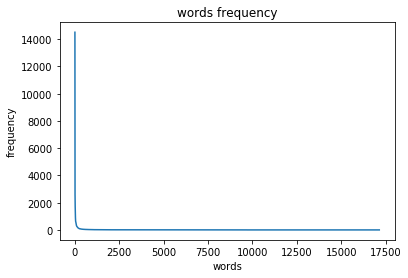

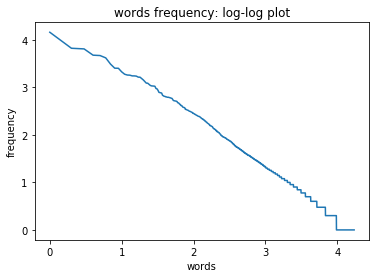

In [2]:
# YOUR CODE MUST BE HERE
%matplotlib inline

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import requests, re

url = "https://www.gutenberg.org/files/2701/old/moby10b.txt"
moby_text = requests.get(url).text
moby_word = re.findall(r"[^\d\W']+", moby_text.lower())
data = Counter(moby_word).most_common()
np_data = np.array(data)

word_name, count = zip(*Counter(moby_word).most_common())
rank = np.arange(len(word_name)) + 1
plt.plot(rank, count)
plt.title("words frequency")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()

plt.plot(np.log10(rank), np.log10(count))
plt.title("words frequency: log-log plot")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()



**Your output should be like**:
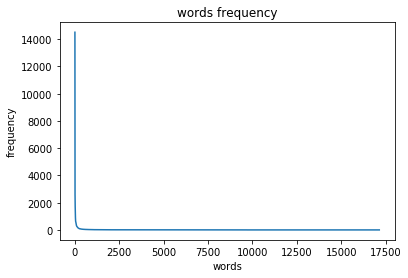

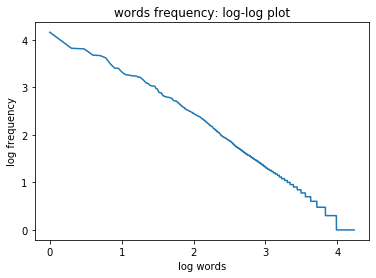

### Discussion

- Read this wikipedia article : https://ko.wikipedia.org/wiki/%EC%A7%80%ED%94%84%EC%9D%98_%EB%B2%95%EC%B9%99)
- Discuss what you learned from the distribution.
- WRITE HERE (To edit, double click this cell)

모비딕 text 파일에서 글을 읽어와서 단어가 나타나는 횟수를 알아내고, 그것을 높은 순서대로 나열했을 때, 순위와 단어의 횟수 사이에는 상관관계가 나타났다. 양 축을 로그 취했을 때, 반비례 그래프와 유사하게 경향성이 나타난다. 이렇게 text 등에 나오는 단어들을 자주 쓰이는 순서대로 나열했을 때, 대부분의 경우에 단어의 사용빈도와 해당 단어의 순위가 반비례하게 나타난다. 이것이 지프의 법칙이다.


### 1.3 Word Cloud (5 pts)

- Print top 10 most words except stop words
- Draw word cloud of top 10 most common words

**Your output should be like**:
```python
[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]
```
**Your output should be like this (but NOT exactly the the same)**:
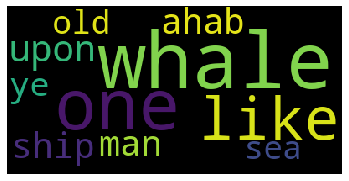

- The following is English stop words list

In [3]:
stopwords = {'it', 'than', 'out', 'an', 'at', 'until', 'wouldn', 'too', 'each', 'off', 'whom', 'not', 'ain', 'weren', "you've", 'isn', 've', "that'll", 'didn', 'couldn', 'with', 'for', 'me', "shouldn't", 'those', 'once', 'them', 'him', 'again', 'what', 'to', 's', 'don', 'yourselves', "she's", 'd', 'we', 'so', 'does', 'your', 'is', 'such', 'hasn', 'doesn', "doesn't", 'no', 'll', 'their', 'before', 'my', 'being', 'and', 'but', 'below', 'won', "don't", 't', 'myself', 'very', 'why', "mustn't", 'that', 'been', 'you', "you'd", 'few', 'other', 'ma', 'any', 'having', 'against', 'into', 'on', 'just', 'herself', "hadn't", "mightn't", 'aren', "wouldn't", 'ours', 'about', 'then', 'mustn', 'i', 'y', 'should', 'all', 'while', 'himself', 'do', 'up', 'were', 'this', 'most', 'when', 'nor', 'from', 'hadn', 'theirs', 'she', 'be', 'under', 'or', 'will', 'through', 'our', "isn't", 'as', 'between', 'had', 'more', "aren't", "weren't", 'if', 'the', 'am', 'how', 'both', "you're", 'yourself', "couldn't", 'only', 'in', 'itself', 'own', "it's", 'because', 'some', "didn't", 'wasn', 'shan', "hasn't", 'mightn', 'shouldn', 'here', 'he', 'where', 'm', 're', 'was', 'after', 'has', 'same', "shan't", 'further', "wasn't", 'down', 'yours', "should've", 'now', "needn't", 'above', 'haven', 'its', 'who', 'of', 'ourselves', 'did', 'these', 'there', 'his', "haven't", "won't", 'themselves', "you'll", 'a', 'are', 'which', 'have', 'by', 'during', 'can', 'hers', 'over', 'her', 'doing', 'o', 'needn', 'they'}

[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]


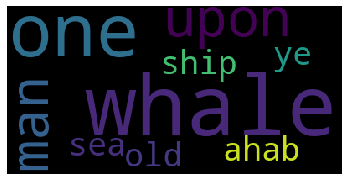

In [4]:
# YOUR CODE MUST BE HERE
import numpy as np
from collections import Counter
from wordcloud import WordCloud

word_name, count = zip(*Counter(moby_word).most_common())

np_word_name = np.array(word_name)
np_count = np.array(count)
index = []
for i in range(np_word_name.size):
    if word_name[i] in stopwords:
        index.append(i)
np_word_name2 = np.delete(np_word_name, index)
np_count2 = np.delete(np_count, index)
top_10 = []
for i in range(10):
    top_10.append((np_word_name2[i], np_count2[i]))
print(top_10)

text = ''
for i in range(10):
    text = text + " "+ np_word_name2[i]
wordcloud = WordCloud(max_font_size=100).generate(text)

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()




## Problem 2 (20 pts)

- We want to find how many CS faculty members at CS department of Stanford Univ work on CS research areas.
- First, visit https://cs.stanford.edu/research
- Take a look at the source html of the web page.
- We want to scrape data on all the faculty members
- Run the following two cells and see what happens
- If necessary, install html5lib

In [5]:
from bs4 import BeautifulSoup
import requests

url = "https://cs.stanford.edu/research?items_per_page=All&field_faculty_status_value=active"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [6]:
print(soup.tbody.prettify())

<tbody>
 <tr>
  <td class="views-field views-field-field-faculty-photo views-align-center border-simple">
   <a href="https://profiles.stanford.edu/maneesh-agrawala" target="_blank">
    <img alt="" height="158" src="https://cs.stanford.edu/sites/default/files/styles/faculty_profile/public/maneesh.jpeg?itok=sb_Xu2fp" typeof="foaf:Image" width="110"/>
   </a>
  </td>
  <td class="views-field views-field-title fac_prof_view_name">
   <a href="https://profiles.stanford.edu/maneesh-agrawala" target="_blank">
    Maneesh Agrawala
   </a>
  </td>
  <td class="views-field views-field-field-faculty-title fac_prof_view_title">
   Professor
  </td>
  <td class="views-field views-field-field-research-focus fac_prof_view_focus">
   Computer Graphics
   <br/>
   Human-Computer Interaction (HCI)
  </td>
 </tr>
 <tr>
  <td class="views-field views-field-field-faculty-photo views-align-center border-simple">
   <a href="http://theory.stanford.edu/~aiken/" target="_blank">
    <img alt="" height="158" 

### Draw bar charts on research area contributions of Stanford CS faculty

- The followings are research fields
```python
['Architecture', 'Artificial Intelligence', 'Computational Biology', 'Computer Graphics', 'Computer Security', 'Computer Systems', 'Computer Vision', 'Data Science', 'Education', 'Human-Computer Interaction (HCI)', 'Machine Learning', 'Natural Language Processing', 'Networking', 'Operating/Distributed Systems', 'Programming Systems and Verification', 'Robotics', 'Theory']
```

- In plotting, use the following abbreviations:

```
['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 'EDU', 'HCI', 'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']
```

- For each research area, we want to compute how many professors works on that area.
- If one professor works on n research fields, the contribution to one research field is 1/n.
- The colors for professor ranks (assistant, associate, full professors) may be your own choice.
- Your output should be like:

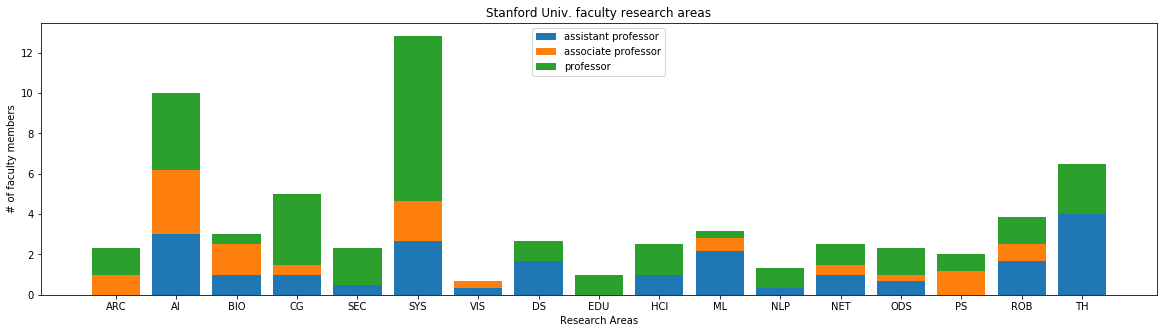

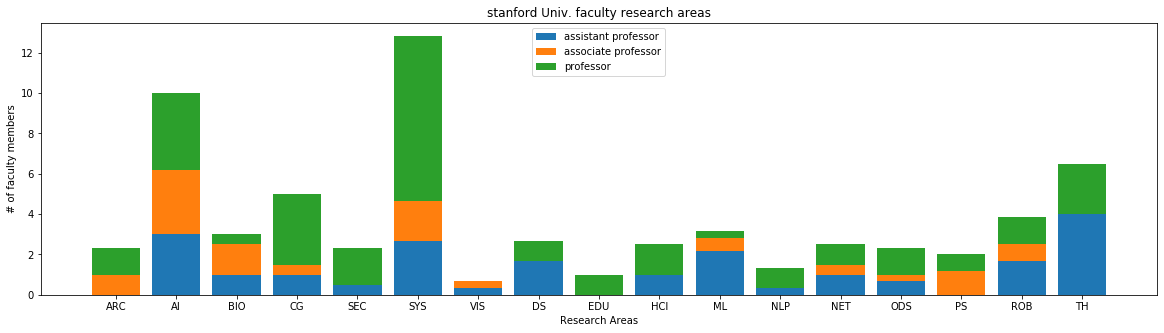

In [7]:
# YOUR CODE MUST BE HERE
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def what_research(data):
    """교수님이 해당 research field에서 어느정도 기여하는지 알 수 있는 함수"""
    RF = ['Architecture', 'Artificial Intelligence', 'Computational Biology', 'Computer Graphics', 'Computer Security', 'Computer Systems', 'Computer Vision', 'Data Science', 'Education', 'Human-Computer Interaction (HCI)', 'Machine Learning', 'Natural Language Processing', 'Networking', 'Operating/Distributed Systems', 'Programming Systems and Verification', 'Robotics', 'Theory']
    count_list = [0] * len(RF)
    for i in range(len(RF)):
        if RF[i] in data:
            count_list[i] += 1
    return(np.array(count_list)/sum(count_list))


RF_label = ['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 'EDU', 'HCI', 'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']

Pf_assist = [0] * len(RF_label)
Pf_associ = [0] * len(RF_label)
Pf_pf = [0] * len(RF_label)

tmp3 = [td.text for td in soup('td') if td.get('class')]
for i in range(2, len(tmp3)+1, 4):
    if 'Assistant Professor' in tmp3[i]:
        Pf_assist += what_research(tmp3[i+1])                    
    elif 'Associate Professor' in tmp3[i]:
        Pf_associ += what_research(tmp3[i+1])
    else :
        Pf_pf += what_research(tmp3[i+1])
        
plt.figure(figsize = (20, 5))
plt.bar(RF_label, Pf_assist, label = 'assistant professor')
plt.bar(RF_label, Pf_associ, bottom = Pf_assist, label = 'associate professor')
plt.bar(RF_label, Pf_pf, bottom = Pf_assist + Pf_associ, label = 'professor')
plt.title("stanford Univ. faculty research areas")
plt.xlabel("Research Areas")
plt.ylabel("# of faculty members")
plt.legend(loc=9)
plt.show()

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview"
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted
- Your homework will be graded on the basis of correctness and programming skills